In [30]:
import requests
import pandas as pd
import numpy as np

In [37]:
df = pd.read_table('https://ec.europa.eu/eurostat/databrowser-backend/api/extraction/1.0/LIVE/false/sdmx/csv/avia_paoc__custom_9948365?startPeriod=1993-01&i&compressed=false', delimiter=',', usecols=['TIME_PERIOD', 'OBS_VALUE'])
df['TIME_PERIOD'] = pd.to_datetime(df.TIME_PERIOD)
df.set_index('TIME_PERIOD', inplace=True)
df.sort_index(inplace=True)

<Axes: xlabel='TIME_PERIOD'>

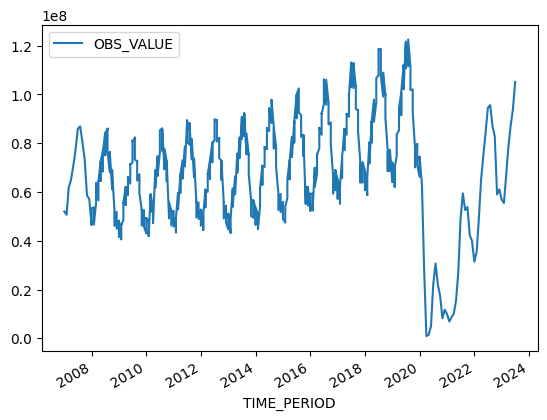

In [38]:
df.plot()

In [44]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ar_select_order
from statsmodels.tsa.arima.model import ARIMA

In [45]:
endog = df.OBS_VALUE
ar_lags = ar_select_order(endog=endog, maxlag=13).ar_lags
arima = ARIMA(endog=endog, order=(ar_lags, 0,0), trend='c', enforce_stationarity=False).fit()

c:\Users\Usuario\GIT\its-toolkit\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Usuario\GIT\its-toolkit\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Usuario\GIT\its-toolkit\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Usuario\GIT\its-toolkit\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

<Axes: xlabel='TIME_PERIOD'>

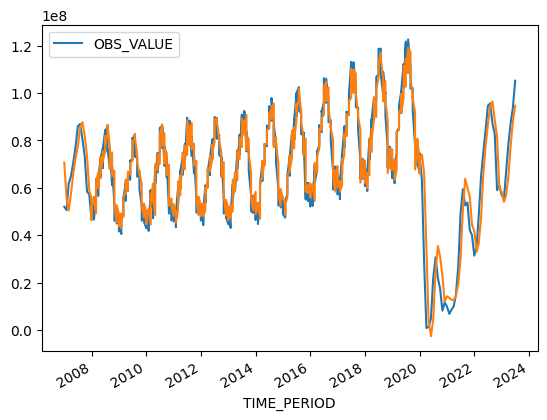

In [48]:
df.plot()
arima.predict().plot()